## 1. Import Libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## 2. Load Dataset

In [2]:
df = pd.read_csv('hw3-dataset.csv')  
df.head()

,REMOTE_PORT,LATENCY,THROUGHPUT,ANOMALY
0,21,15.942875,16.202998,0
1,20,12.666451,15.899084,1
2,80,13.894550,12.958008,0
3,21,13.620813,15.459475,0
4,21,15.705485,15.339565,0


## 3. Prepare Features and Labels
Separate the input features (X) and target labels (y).

In [3]:
X = df.drop('ANOMALY', axis=1)
y = df['ANOMALY']

## 4. Train/Test Split and Scaling
Split the dataset into training and testing sets and apply feature scaling where necessary.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5. Model Training
Train the k-Nearest Neighbors (kNN), Decision Tree (DT), and Gaussian Naive Bayes (GNB) models.

In [6]:
# k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

GaussianNB()

## 6. Model Evaluation
Evaluate the trained models on the test set and print performance metrics.

In [8]:
models = {
    'kNN': knn,
    'Decision Tree': dt,
    'GaussianNB': gnb
}

for name, model in models.items():
    if name == 'Decision Tree':
        y_pred = model.predict(X_test)
    else:
        y_pred = model.predict(X_test_scaled)
    
    print(f"\nModel: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))


Model: kNN
Accuracy: 0.9508
Confusion Matrix:
[[116   0]
 [  6   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       116
           1       0.00      0.00      0.00         6

    accuracy                           0.95       122
   macro avg       0.48      0.50      0.49       122
weighted avg       0.90      0.95      0.93       122


Model: Decision Tree
Accuracy: 0.9508
Confusion Matrix:
[[114   2]
 [  4   2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       116
           1       0.50      0.33      0.40         6

    accuracy                           0.95       122
   macro avg       0.73      0.66      0.69       122
weighted avg       0.94      0.95      0.95       122


Model: GaussianNB
Accuracy: 0.9836
Confusion Matrix:
[[116   0]
 [  2   4]]
Classification Report:
              precision    recall  f1-score   supp

## 7. Input Data Visualization
Plot the input data distribution to see separation between classes.

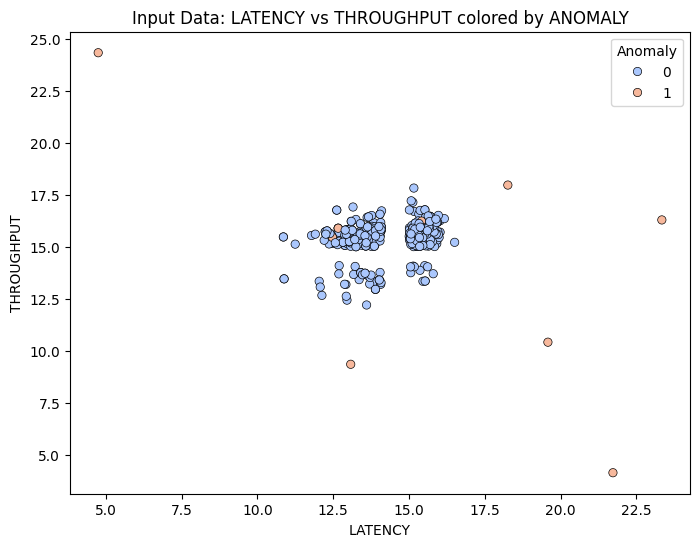

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X['LATENCY'], 
    y=X['THROUGHPUT'], 
    hue=y, 
    palette='coolwarm', 
    edgecolor='k'
)
plt.title('Input Data: LATENCY vs THROUGHPUT colored by ANOMALY')
plt.xlabel('LATENCY')
plt.ylabel('THROUGHPUT')
plt.legend(title='Anomaly')
plt.show()

## 8. Decision Boundary Visualization
Visualize decision boundaries for kNN and GNB using only two features: LATENCY and THROUGHPUT.

In [13]:
def plot_decision_boundary(X, y, model, title):
    X = X[['LATENCY', 'THROUGHPUT']]  # Focus only on two features
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.1),
        np.arange(y_min, y_max, 0.1)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(('blue', 'red')))
    sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=y, edgecolor='k')
    plt.title(title)
    plt.xlabel('LATENCY')
    plt.ylabel('THROUGHPUT')
    plt.legend(title='Anomaly')
    plt.show()

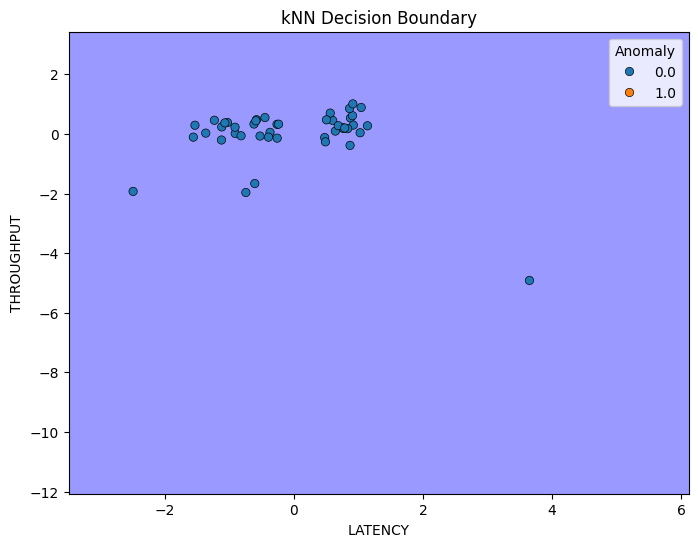

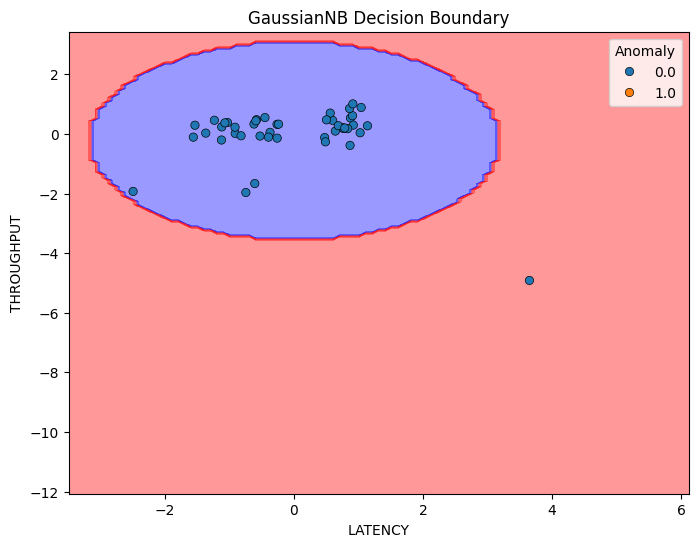

In [14]:
X_2f = df[['LATENCY', 'THROUGHPUT']]
y = df['ANOMALY']

X_train_2f, X_test_2f, y_train_2f, y_test_2f = train_test_split(X_2f, y, test_size=0.3, random_state=42)

# Scaling
scaler_2f = StandardScaler()
X_train_2f_scaled = scaler_2f.fit_transform(X_train_2f)
X_test_2f_scaled = scaler_2f.transform(X_test_2f)

# Train kNN and GNB again on 2 features
knn_2f = KNeighborsClassifier(n_neighbors=5)
knn_2f.fit(X_train_2f_scaled, y_train_2f)

gnb_2f = GaussianNB()
gnb_2f.fit(X_train_2f_scaled, y_train_2f)

# Plot for kNN
plot_decision_boundary(
    pd.DataFrame(X_test_2f_scaled, columns=['LATENCY', 'THROUGHPUT']), 
    y_test_2f, 
    knn_2f, 
    'kNN Decision Boundary'
)

# Plot for GNB
plot_decision_boundary(
    pd.DataFrame(X_test_2f_scaled, columns=['LATENCY', 'THROUGHPUT']), 
    y_test_2f, 
    gnb_2f, 
    'GaussianNB Decision Boundary'
)

## 9. Additional Dataset (TBD)
Load another dataset and repeat the training and evaluation.

In [15]:
df_credit = pd.read_csv('creditcard.csv')
df_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 10. Preprocessing and Sampling
Analyze dataset imbalance and prepare a balanced sample for initial model training.

In [16]:
df_credit.info()
df_credit.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [17]:
print(df_credit['Class'].value_counts())
print(df_credit['Class'].value_counts(normalize=True))  # Percentage

Class
0    284315
1       492
Name: count, dtype: int64
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


In [18]:
# Separate fraud and normal transactions
df_fraud = df_credit[df_credit['Class'] == 1]
df_normal = df_credit[df_credit['Class'] == 0]

# Sample normal transactions (make it same size or slightly bigger than frauds)
df_normal_sampled = df_normal.sample(n=5000, random_state=42)

# Combine back
df_sampled = pd.concat([df_fraud, df_normal_sampled])

# Shuffle the combined dataset
df_sampled = df_sampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Check new balance
print(df_sampled['Class'].value_counts())


Class
0    5000
1     492
Name: count, dtype: int64


## 11. Train/Test Split and Scaling
Split the balanced dataset into training and testing sets and apply feature scaling.

In [19]:
# Features and labels
X = df_sampled.drop(['Class', 'Time'], axis=1)  # Drop 'Class' (target) and 'Time' (not very useful)
y = df_sampled['Class']

# Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 12. Model Training on Credit Card Dataset
Train k-Nearest Neighbors, Decision Tree, and Gaussian Naive Bayes models on the balanced credit card fraud dataset.

In [20]:
# k-Nearest Neighbors
knn_credit = KNeighborsClassifier(n_neighbors=5)
knn_credit.fit(X_train_scaled, y_train)

# Decision Tree
dt_credit = DecisionTreeClassifier(random_state=42)
dt_credit.fit(X_train, y_train)

# Gaussian Naive Bayes
gnb_credit = GaussianNB()
gnb_credit.fit(X_train_scaled, y_train)


GaussianNB()

## 13. Model Evaluation on Credit Card Dataset
Evaluate the trained models using confusion matrix, precision, recall, and F1-score.

In [21]:
models_credit = {
    'kNN': knn_credit,
    'Decision Tree': dt_credit,
    'GaussianNB': gnb_credit
}

for name, model in models_credit.items():
    if name == 'Decision Tree':
        y_pred = model.predict(X_test)
    else:
        y_pred = model.predict(X_test_scaled)
    
    print(f"\nModel: {name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))



Model: kNN
Confusion Matrix:
[[1496    4]
 [  25  123]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1500
           1       0.97      0.83      0.89       148

    accuracy                           0.98      1648
   macro avg       0.98      0.91      0.94      1648
weighted avg       0.98      0.98      0.98      1648


Model: Decision Tree
Confusion Matrix:
[[1477   23]
 [  23  125]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1500
           1       0.84      0.84      0.84       148

    accuracy                           0.97      1648
   macro avg       0.91      0.91      0.91      1648
weighted avg       0.97      0.97      0.97      1648


Model: GaussianNB
Confusion Matrix:
[[1448   52]
 [  22  126]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97 

## 14. Confusion Matrix Visualization
Plot the confusion matrix for each trained model to better understand the model performance

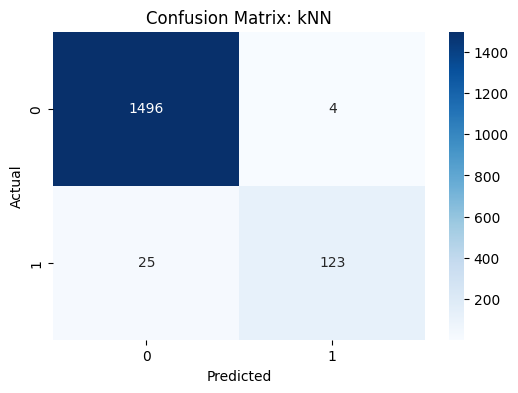

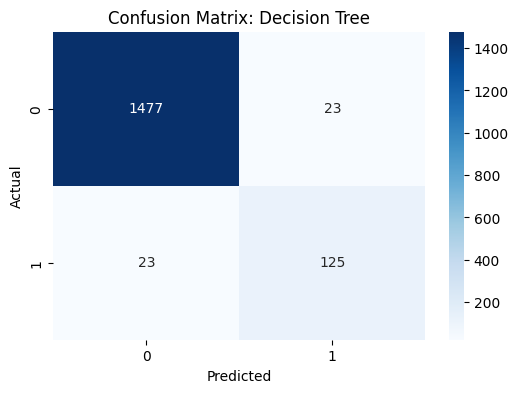

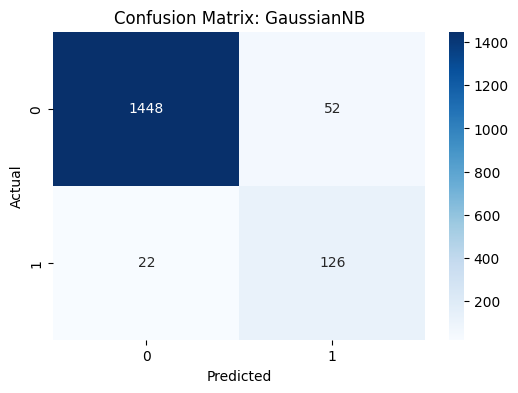

In [22]:
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices for each model
for name, model in models_credit.items():
    if name == 'Decision Tree':
        y_pred = model.predict(X_test)
    else:
        y_pred = model.predict(X_test_scaled)
    
    plot_conf_matrix(y_test, y_pred, title=f'Confusion Matrix: {name}')

# 14. Final Summary

In this assignment, I've explored the application of three classic machine learning models — k-Nearest Neighbors (kNN), Decision Tree (DT), and Gaussian Naive Bayes (GNB) — on two different datasets.

First, I worked with a simple synthetic dataset containing features `REMOTE_PORT`, `LATENCY`, and `THROUGHPUT`. I've performed preprocessing, scaling, model training, and visualized both the input data and decision boundaries. Evaluation was conducted through confusion matrices and classification reports.

Then, I extended work to a real-world, highly imbalanced dataset: Credit Card Fraud Detection. Due to the significant imbalance between normal and fraud transactions, I decided to perform strategic sampling to balance the dataset. I split the data into training and test sets with stratification, applied scaling, trained all three models, and evaluated their performance, focusing on precision, recall, and F1-score — crucial metrics for fraud detection.

Additionally, confusion matrix heatmaps were created to visually assess model performance.

Through this project, we reinforced critical machine learning skills such as data preprocessing, model training, evaluation metric selection, and the importance of proper visualization and result interpretation.

Overall, the models demonstrated varied performance depending on the dataset characteristics, with particular emphasis on the importance of handling imbalanced data and choosing the right evaluation metrics beyond simple accuracy.
